<a href="https://colab.research.google.com/github/bushtets/machine_learnig/blob/main/LineAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sample_data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df.sort_values(by = "id")


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2496,1000102,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
6735,1200019,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
8411,1200021,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
8809,2800031,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16737,9842300095,20140725T000000,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168
3260,9842300485,20150311T000000,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150
7621,9842300540,20140624T000000,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538
20979,9895000040,20140703T000000,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,900,510,2011,0,98027,47.5446,-122.018,1440,1188


In [8]:
# Заметим, что в date содержится charвская переменная T
df = df.drop('date', axis = 1)

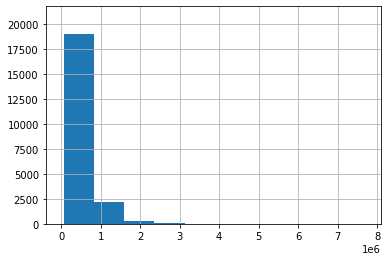

In [9]:
# Строим гистограмму цен
df["price"].hist();
df["yr_renovated"].hist()

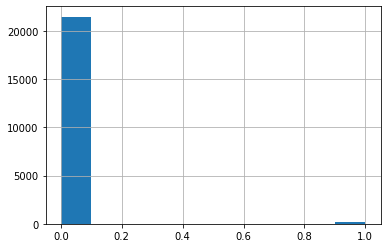

In [10]:
df['waterfront'].hist()

In [11]:
#Т.к waterfront всюду равен 0 можно его дропнуть
df = df.drop('waterfront', axis = 1)

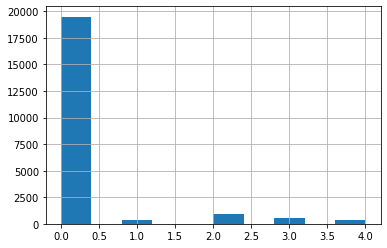

In [12]:
df['view'].hist()

In [13]:
df = df.drop('view', axis = 1)

In [14]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df= df.drop(['yr_renovated','sqft_basement' ], axis = 1)

In [16]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


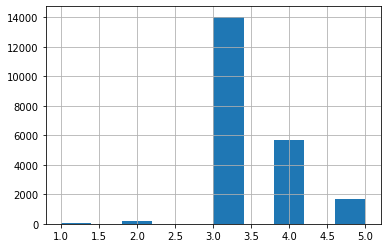

In [17]:
df['condition'].hist()

In [18]:
#Разобъем данные на целевую переменную y и сами данные X
X = df.drop('price', axis = 1)
y=  df['price']

In [19]:
# Видно, что sqft_above линейно зависим с sqft_living
df = df.drop('sqft_above', axis =1)

In [20]:

#Импортируем еще одну графическую библиотеку
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


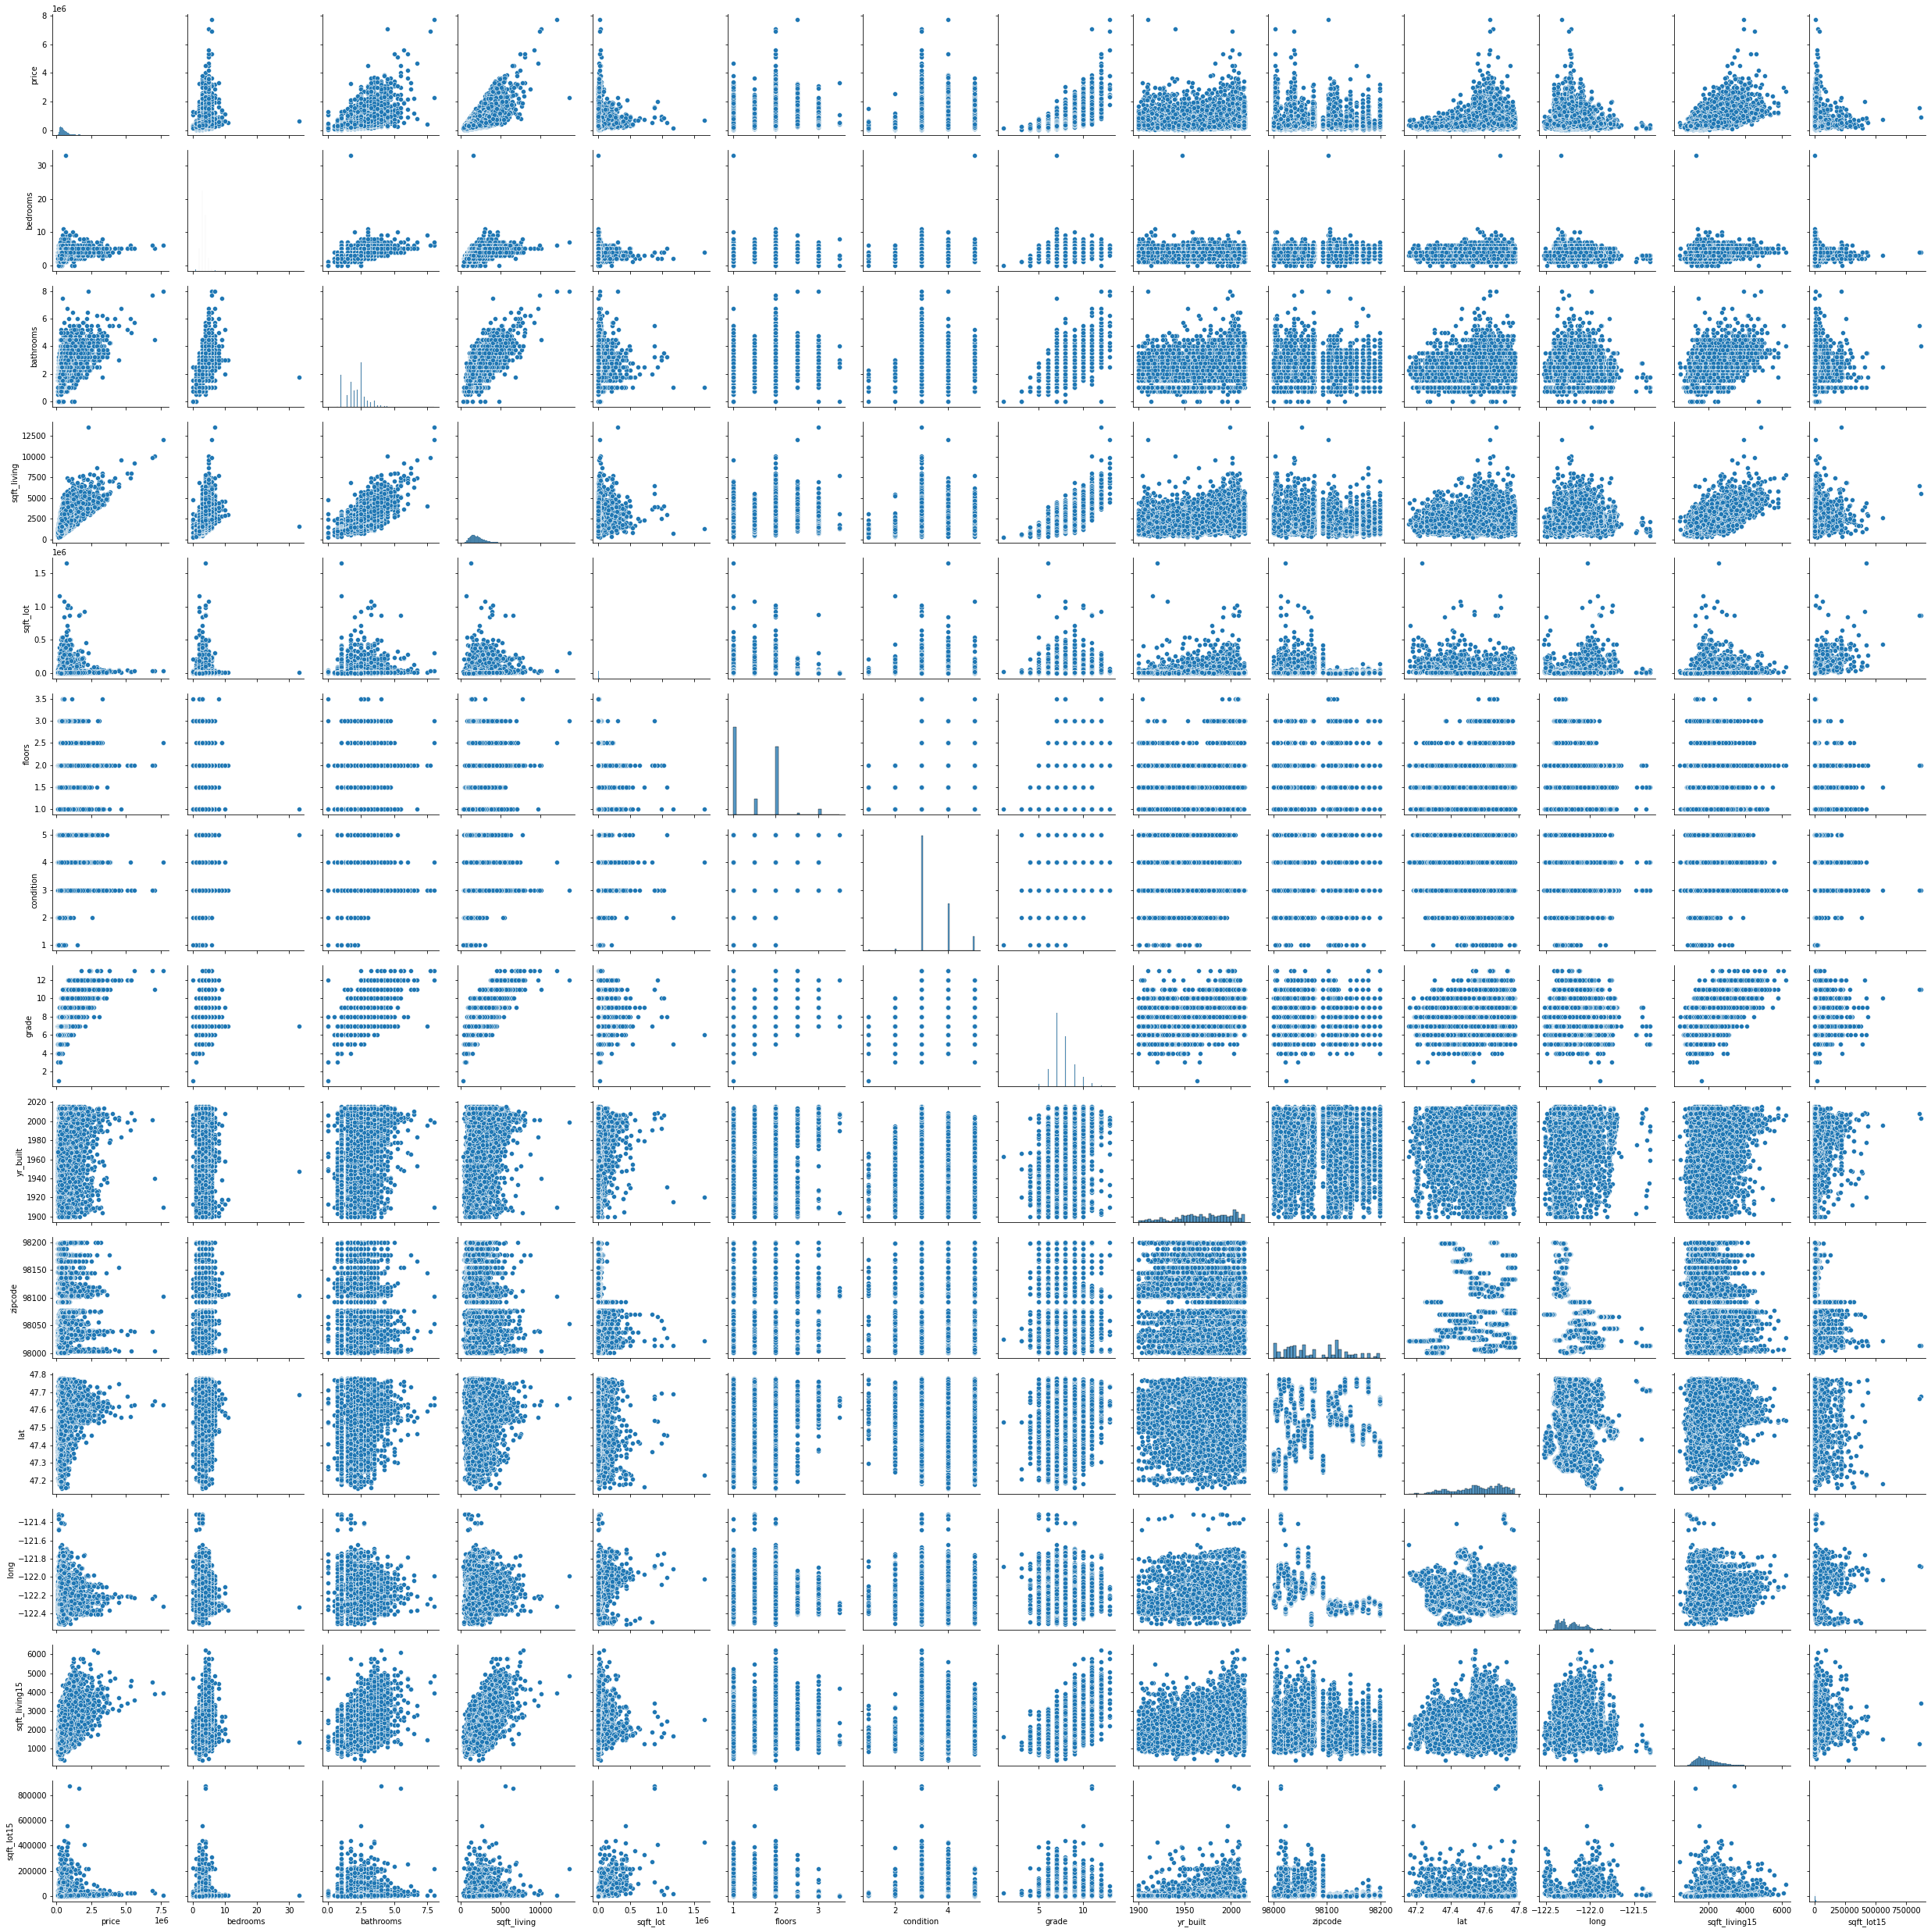

In [21]:
#Попарные графики
sns.pairplot(df.drop('id', axis=1), size=2.5)

In [22]:
#Выбросим часть столбцов. На графике видно, что присутсвует линейная зависимость между price и sqft_living. И sqft_living с grade 
data=df[['price', 'grade', 'sqft_living']]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


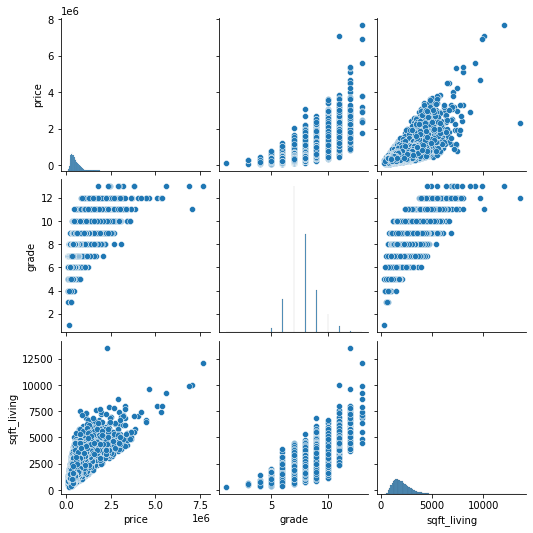

In [23]:
sns.pairplot(data, size=2.5)

In [24]:
#Подключаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
#Разделение данных на тестовую и тренировочную выборки
#Подключаем функцию разделения данных
from sklearn.model_selection import train_test_split

In [26]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503


In [27]:
df_train, df_test = train_test_split(df[['sqft_living', 'price']], test_size = 0.3)

#Данные в X, здесь выбросили из датафрейма столбец "price", axis = 1 указывает, что работа со столбцом
X_train=df_train.drop(['price'], axis = 1)
X_test=df_test.drop(['price'], axis = 1)

#Целевая переменная в y
y_train=df_train[['price']]
y_test=df_test[['price']]

In [28]:
#Подключаем метод Линейной регрессии для работы
from sklearn.linear_model import LinearRegression
# Объявили модель
model_regression = LinearRegression()

In [29]:
# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)
# Сделали прогнозы на тестовой выборке 
y_test_predict = model_regression.predict(X_test)

In [30]:
import numpy as np

In [31]:
#метрики качества для регрессии
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
y_train_predict = model_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
#Печать строки 'RMSE is {}', на месте {} будет подставляться rmse
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = model_regression.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 262187.1803131891
R2 score is 0.48887028521382225


The model performance for testing set
--------------------------------------
RMSE is 259721.79041406172
R2 score is 0.5019588904052219


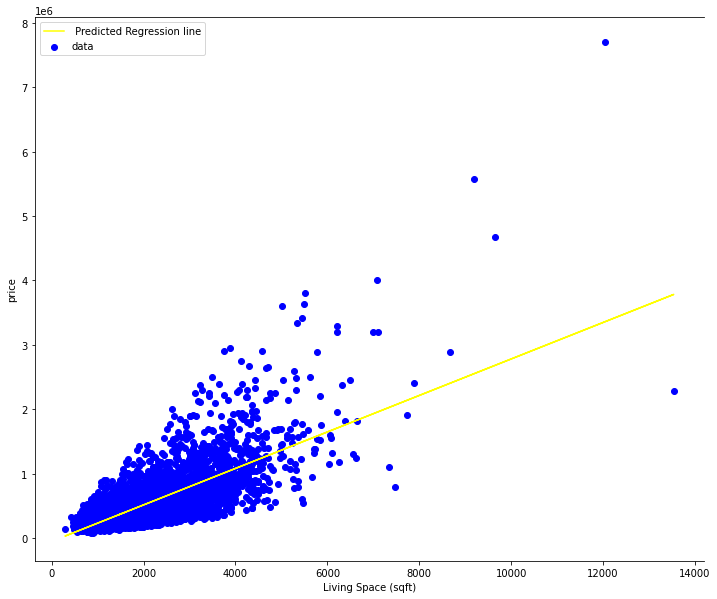

In [33]:
# получили плохой результат на MSE т.к между price и sqft_living наблюдается линейная зависимость
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(X_test, y_test, color= 'blue', label = 'data')
plt.plot(X_test, model_regression.predict(X_test), color='yellow', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [34]:
#Берём следующую пару

df_train, df_test = train_test_split(df[['grade', 'price']], test_size = 0.3)

#Данные в X, здесь выбросили из датафрейма столбец "price", axis = 1 указывает, что работа со столбцом
X_train=df_train.drop(['price'], axis = 1)
X_test=df_test.drop(['price'], axis = 1)

#Целевая переменная в y
y_train=df_train[['price']]
y_test=df_test[['price']]

In [35]:
#Подключаем метод Линейной регрессии для работы
from sklearn.linear_model import LinearRegression
# Объявили модель
regression = LinearRegression()

In [36]:
# Обучили модель на тренировочной выборке 
regression.fit(X_train, y_train)
# Сделали прогнозы на тестовой выборке 
y_test_predict = regression.predict(X_test)

In [37]:
y_train_predict = regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
#Печать строки 'RMSE is {}', на месте {} будет подставляться rmse
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = regression.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 277989.2818038486
R2 score is 0.43890246358703


The model performance for testing set
--------------------------------------
RMSE is 262333.508847885
R2 score is 0.4618789864104239


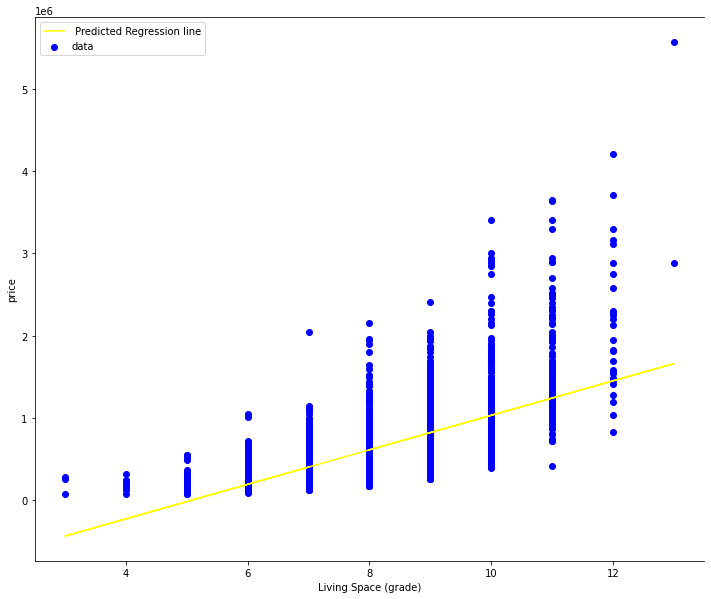

In [38]:
# получили плохой результат на MSE т.к между price и sqft_living наблюдается линейная зависимость
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(X_test, y_test, color= 'blue', label = 'data')
plt.plot(X_test, regression.predict(X_test), color='yellow', label= ' Predicted Regression line')
plt.xlabel('Living Space (grade)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)